# machine learning
scikit learn
standard module of ML
AI (Optimization (ML (Deep Learning)))
ML:1.Optimization => 最小化誤差
   2.從data中學得function 要先有data才能ML

給定X座標 
你套用了某種function 會得到predicted point (X,y_pred)
但真實的real point 是在(X,y)
y跟y_pred中會有誤差 prediction error (y-y_pred)^2
一直修正function 的係數直到獲得 min loss

你想要找到可以fit所有data的function 稱為model(可能是一次多項式,二次...)
而套用不同的model parameter 你可以得到不同的function

一般而言ML處理 tableau form data
有很多attribute (視為多維空間的distribution)
前幾行稱為feature 而最後一行通常是你最好奇的 稱為label
每一列稱為 record/sample
每個record 有自己的 feature vector
其中一格稱為cell

attribute可能是1.數值 numeric values(電腦擅長的) 2.非數值 categorical value(需要被convert)

supervised learning:已經給定了解答(label)的data
label有可能是continuous =>做regression =>LSE 
label也有可能是discrete =>你要區分(classification) 
=>1.可以用decision tree 利用各種attribute 做不同的分割
=>2.用SVC(Support Vector Classifier)找出最大的分割空檔

把所有已知的data分成兩區 1.training data 2.test data
透過training data 取得最適的 model =>會有training accuracy(我們不太care)
接著把test data套到model 你就可以看看predict 跟 real label差多少 =>testing accuracy

步驟
1.取得資料 用request or selenium
2.clean data (例如把null清掉)
3.feature selection (但是我們的題目都已經在tableau)
4.選取合適model
5.train/test
6.evaluation

In [36]:
import random
import numpy as np
def SplitTrainTest(data):
    train_data=[]
    test_data=[]
    for i in range(100):
        randnum=random.randint(0, 9)
        if(randnum<7):
            train_data.append(list(data[i]))
        else:
            test_data.append(list(data[i]))
    delta=70-len(train_data)
    if delta>0:
        for i in range(delta):
            randi=random.randint(0, len(test_data)-1)
            train_data.append(test_data[randi])
            test_data.pop(randi)
    else:
        delta=-delta
        for i in range(delta):
            randi=random.randint(0, len(train_data)-1)
            test_data.append(train_data[randi])
            train_data.pop(randi)
    return train_data,test_data
sample=[0]*500
for i in range(500):
    sample[i]=random.randint(1, 10)
sample=np.reshape(sample,(100,5))
train,test=SplitTrainTest(sample)
print(len(train))
print(train)
print(len(test))
print(test)


70
[[7, 6, 8, 7, 10], [6, 1, 3, 5, 4], [8, 5, 8, 2, 8], [8, 5, 5, 5, 3], [8, 5, 7, 4, 10], [9, 9, 6, 2, 10], [7, 10, 8, 5, 8], [7, 10, 5, 1, 9], [8, 5, 4, 6, 4], [10, 3, 4, 3, 2], [6, 3, 7, 1, 6], [10, 10, 8, 10, 9], [4, 4, 7, 1, 10], [1, 1, 6, 2, 8], [10, 7, 9, 7, 3], [10, 4, 5, 4, 5], [9, 1, 9, 10, 4], [4, 2, 3, 2, 5], [5, 8, 6, 2, 1], [10, 2, 7, 2, 4], [7, 10, 4, 5, 9], [1, 9, 9, 10, 1], [2, 9, 10, 7, 9], [3, 1, 6, 5, 9], [10, 3, 9, 2, 10], [7, 10, 2, 2, 8], [2, 8, 9, 2, 6], [6, 4, 6, 8, 6], [5, 7, 10, 3, 2], [4, 5, 1, 7, 4], [7, 6, 5, 10, 2], [4, 2, 7, 2, 4], [10, 7, 4, 2, 9], [9, 3, 4, 9, 7], [2, 9, 10, 3, 1], [5, 4, 8, 5, 3], [7, 10, 4, 7, 3], [3, 3, 9, 4, 1], [9, 7, 6, 3, 6], [9, 5, 8, 10, 2], [3, 10, 9, 5, 7], [2, 10, 8, 9, 6], [5, 5, 5, 3, 7], [5, 3, 5, 1, 7], [1, 1, 3, 4, 8], [5, 9, 7, 10, 3], [4, 6, 5, 4, 10], [9, 2, 9, 9, 3], [6, 9, 4, 9, 6], [3, 4, 3, 6, 10], [1, 7, 9, 9, 7], [7, 3, 5, 9, 7], [6, 3, 6, 9, 8], [1, 1, 2, 8, 7], [4, 5, 5, 1, 3], [2, 2, 6, 6, 3], [5, 1, 7, 10,

# scikit-learn
scikit-learn已經幫你處理好好一部份的data了=>datasets.load
所以我們不用collect+clean

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets #內建資料集

In [38]:
digits=datasets.load_digits()

In [39]:
for key,value in digits.items():
    try:
        print(key,value.shape)
    except:
        print(key)

data (1797, 64)
target (1797,)
frame
feature_names
target_names (10,)
images (1797, 8, 8)
DESCR


digit有
1797筆sample =>1797張8*8的圖
每張都有他對應的label(這張是手寫數字幾)
然後label是數字 所以他會reference去label_name陣列

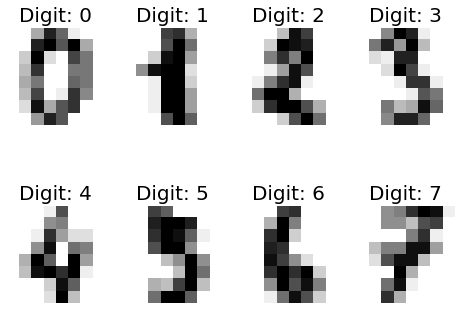

In [40]:
#顯示數據圖片
images_and_labels = list(zip(digits.images,digits.target)) #把data跟label打包
plt.figure(figsize=(8,6))
for index,(image,label) in enumerate(images_and_labels[:8]): #前八張
    plt.subplot(2,4,index+1)   #八張 2x4
    plt.axis('off')   #沒有座標
    plt.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
    plt.title('Digit: %i'%label,fontsize=20)
    

In [41]:
#類似fstring
print("shape of raw image data: {0}".format(digits.images.shape))
print("shape of data: {0}".format(digits.data.shape))

shape of raw image data: (1797, 8, 8)
shape of data: (1797, 64)


ML喜歡tableau 不喜歡那麼多維
所以他把8*8的圖攤平變成一列平平的64格資料

In [42]:
#開始ML
#把它分成train與test
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain , Ytest=train_test_split(digits.data,digits.target,test_size=0.20,random_state=2)
                                              #資料        解答           20%的為test    random seed

In [43]:
data=[n for n in range(1,11)]
print(data)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [44]:
#分成訓練與測試數據集
train_data,test_data=train_test_split(data,random_state=777,train_size=0.8)
print(train_data)
print(test_data)

[9, 4, 5, 6, 2, 10, 7, 8]
[3, 1]


In [45]:
#用支持向量SVM support vector machine
from sklearn import svm
clf=svm.SVC(gamma=0.001,C=100.,probability=True) #創建你的classifier
clf.fit(Xtrain,Ytrain) #你的clf已經train

SVC(C=100.0, gamma=0.001, probability=True)

In [46]:
#擬就來test他是否不錯
from sklearn.metrics import accuracy_score
Ypred = clf.predict(Xtest) #把Xtest套到你的method clf 得到prediction value
accuracy_score(Ytest,Ypred) #比對你的答案跟真的答案
#然後就結束了

0.9777777777777777

In [47]:
clf.score(Xtest,Ytest)

0.9777777777777777

In [48]:
import numpy as np
from sklearn.metrics import accuracy_score
y_pred=[0,2,1,3]
y_true=[0,1,2,3]
accuracy_score(y_true,y_pred)


0.5

In [49]:
accuracy_score(y_true,y_pred,normalize=False)

2

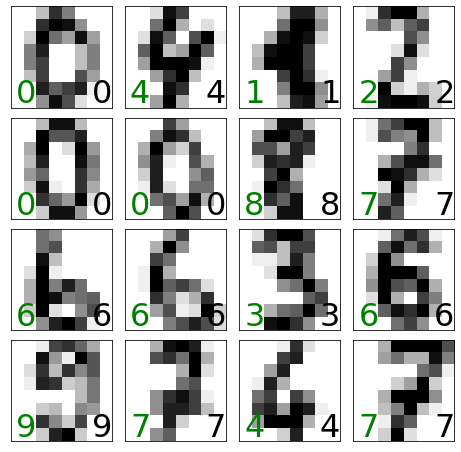

In [68]:
#視覺化
fig,axes = plt.subplots(4,4,figsize=(8,8))
fig.subplots_adjust(hspace=0.1,wspace=0.1)
for i ,ax in enumerate(axes.flat):
    ax.imshow(Xtest[i].reshape(8,8),cmap=plt.cm.gray_r,interpolation='nearest')
    #你的答案在左邊
    ax.text(0.05,0.05,str(Ypred[i]),fontsize=32,
           transform =ax.transAxes,
           color='green' if Ypred[i]==Ytest[i] else 'red')
    #正確答案在右邊
    ax.text(0.8,0.05,str(Ytest[i]),fontsize=32,
           transform =ax.transAxes,
           color='black')
    ax.set_xticks([])
    ax.set_yticks([])

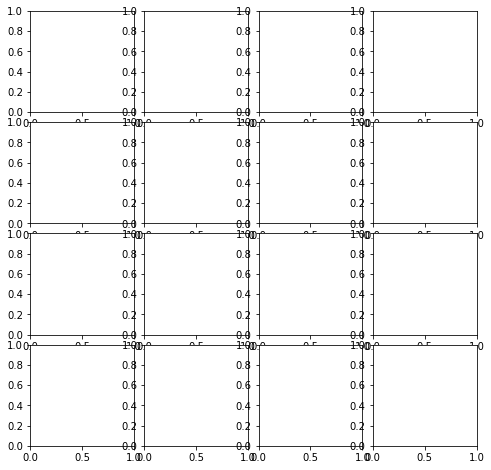

In [69]:
fig,axes = plt.subplots(4,4,figsize=(8,8))
fig.subplots_adjust(hspace=0.1,wspace=0.1)

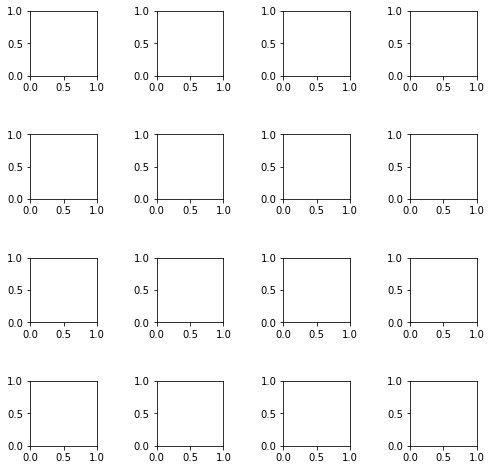

In [70]:
fig,axes = plt.subplots(4,4,figsize=(8,8))
fig.subplots_adjust(hspace=0.9,wspace=0.9)

In [71]:
#Xtest[4]的可能
clf.predict_proba(Xtest[4].reshape(1,-1))

array([[9.93644555e-01, 2.46911628e-04, 5.49319412e-04, 5.92419765e-04,
        3.62335968e-04, 7.38600597e-04, 6.25346560e-04, 4.26320090e-04,
        8.41603920e-04, 1.97258705e-03]])

In [72]:
#產生等差數列
np.linspace(0,3,1000)

array([0.        , 0.003003  , 0.00600601, 0.00900901, 0.01201201,
       0.01501502, 0.01801802, 0.02102102, 0.02402402, 0.02702703,
       0.03003003, 0.03303303, 0.03603604, 0.03903904, 0.04204204,
       0.04504505, 0.04804805, 0.05105105, 0.05405405, 0.05705706,
       0.06006006, 0.06306306, 0.06606607, 0.06906907, 0.07207207,
       0.07507508, 0.07807808, 0.08108108, 0.08408408, 0.08708709,
       0.09009009, 0.09309309, 0.0960961 , 0.0990991 , 0.1021021 ,
       0.10510511, 0.10810811, 0.11111111, 0.11411411, 0.11711712,
       0.12012012, 0.12312312, 0.12612613, 0.12912913, 0.13213213,
       0.13513514, 0.13813814, 0.14114114, 0.14414414, 0.14714715,
       0.15015015, 0.15315315, 0.15615616, 0.15915916, 0.16216216,
       0.16516517, 0.16816817, 0.17117117, 0.17417417, 0.17717718,
       0.18018018, 0.18318318, 0.18618619, 0.18918919, 0.19219219,
       0.1951952 , 0.1981982 , 0.2012012 , 0.2042042 , 0.20720721,
       0.21021021, 0.21321321, 0.21621622, 0.21921922, 0.22222

In [73]:
#把陣列弄成兩行
np.linspace(0,3,1000).reshape(-1,2)

array([[0.        , 0.003003  ],
       [0.00600601, 0.00900901],
       [0.01201201, 0.01501502],
       [0.01801802, 0.02102102],
       [0.02402402, 0.02702703],
       [0.03003003, 0.03303303],
       [0.03603604, 0.03903904],
       [0.04204204, 0.04504505],
       [0.04804805, 0.05105105],
       [0.05405405, 0.05705706],
       [0.06006006, 0.06306306],
       [0.06606607, 0.06906907],
       [0.07207207, 0.07507508],
       [0.07807808, 0.08108108],
       [0.08408408, 0.08708709],
       [0.09009009, 0.09309309],
       [0.0960961 , 0.0990991 ],
       [0.1021021 , 0.10510511],
       [0.10810811, 0.11111111],
       [0.11411411, 0.11711712],
       [0.12012012, 0.12312312],
       [0.12612613, 0.12912913],
       [0.13213213, 0.13513514],
       [0.13813814, 0.14114114],
       [0.14414414, 0.14714715],
       [0.15015015, 0.15315315],
       [0.15615616, 0.15915916],
       [0.16216216, 0.16516517],
       [0.16816817, 0.17117117],
       [0.17417417, 0.17717718],
       [0.

In [74]:
#保存模型參數
import joblib
joblib.dump(clf,'digits_svm.plk')

['digits_svm.plk']

In [75]:
clf=joblib.load('digits_svm.plk')
Ypred=clf.predict(Xtest)
clf.score(Xtest,Ytest)

0.9888888888888889

In [84]:
import random
max_score=0
for i in range (10):
    Xtrain, Xtest, Ytrain , Ytest=train_test_split(digits.data,digits.target,test_size=random.uniform(0.2,0.5),random_state=i)
    clf=svm.SVC(gamma=0.001,C=100.,probability=True)
    clf.fit(Xtrain,Ytrain)
    Ypred = clf.predict(Xtest)
    score=accuracy_score(Ytest,Ypred)
    if(max_score<score):
        max_score=score
    print(score)
print("----------------")
print(max_score)

0.9888888888888889
0.9920424403183024
0.9829351535836177
0.9872340425531915
0.9898550724637681
0.988929889298893
0.9890829694323144
0.9912390488110138
0.9859154929577465
0.9917127071823204
----------------
0.9920424403183024


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets #內建資料集
iris=datasets.load_iris()
for key,value in iris.items():
    try:
        print(key,value.shape)
    except:
        print(key)

data (150, 4)
target (150,)
frame
target_names (3,)
DESCR
feature_names
filename


# Iris

In [4]:
print(iris['data'])
#print(len(iris['data']))

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [6]:
print(type(iris['target']))

<class 'numpy.ndarray'>


In [26]:
print(iris['target_names'])

['setosa' 'versicolor' 'virginica']


In [27]:
print(iris['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


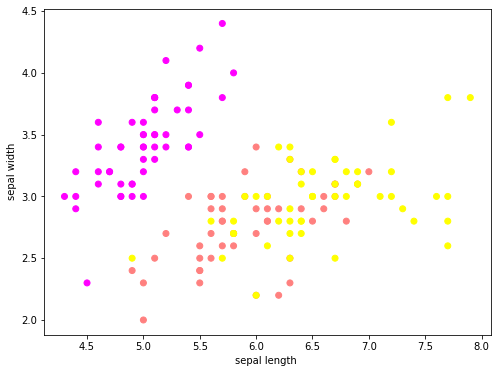

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

Iris = datasets.load_iris()
X = Iris.data[:, 0:2]
y = Iris.target


plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.xlabel('sepal length ')
plt.ylabel('sepal width')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='spring')

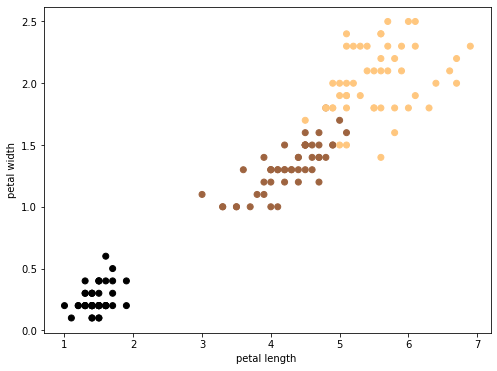

In [87]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets #內建資料集
import pandas as pd
import matplotlib.pyplot as plt

Iris = datasets.load_iris()
X = Iris.data[:, 2:4]
y = Iris.target


plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.xlabel('petal length ')
plt.ylabel('petal width')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='copper')

In [89]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
def TrainingDistinguishIris(X,Y):
    l_0_1=l_1_2=w_0_1=w_1_2=0
    for idx, i in enumerate(Y):
        if i==0:
            if X[idx][2]>l_0_1:
                l_0_1= X[idx][2]
            if X[idx][3]>w_0_1:
                w_0_1= X[idx][3]
        if i==1:
            if X[idx][2]>l_1_2:
                l_1_2= X[idx][2]
            if X[idx][3]>w_1_2:
                w_1_2= X[idx][3]
    return l_0_1,l_1_2,w_0_1,w_1_2
def TestDistinguishIris(l_0_1,l_1_2,w_0_1,w_1_2,X):
    y_pred=[0]*len(X)
    for i in range(len(X)):
        if X[i][2]>l_1_2 and X[i][3]>w_1_2:
            y_pred[i]=2
        elif X[i][2]>l_0_1 and X[i][3]>w_0_1:
            y_pred[i]=1
    return y_pred
iris = datasets.load_iris()
Xtrain, Xtest, Ytrain , Ytest=train_test_split(iris.data,iris.target,test_size=0.20,random_state=2)
l_0_1,l_1_2,w_0_1,w_1_2=TrainingDistinguishIris(Xtrain,Ytrain)
y_pred=TestDistinguishIris(l_0_1,l_1_2,w_0_1,w_1_2,Xtest)
accuracy_score(Ytest,y_pred)   

0.8333333333333334

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

n_dots=20
x=np.linspace(0,1,n_dots)  #在0~1中生成20個點
y=np.sqrt(x)+0.2*np.random.rand(n_dots)-0.1

In [38]:
def plot_polynomial_fit(x,y,order):
    p = np.poly1d(np.polyfit(x,y,order))
    t=np.linspace(0,1,200)
    plt.plot(x,y,'ro',t,p(t),'-',t,np.sqrt(t),'r--')
    return p

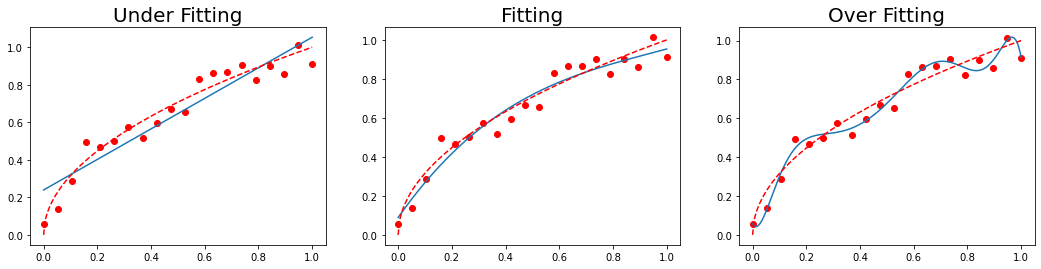

In [39]:
plt.figure(figsize=(18,4))
titles=['Under Fitting','Fitting','Over Fitting']
models=[None,None,None]
for index, order in enumerate([1,3,10]):
    plt.subplot(1,3,index+1)
    models[index]=plot_polynomial_fit(x,y,order)
    plt.title(titles[index],fontsize=20)


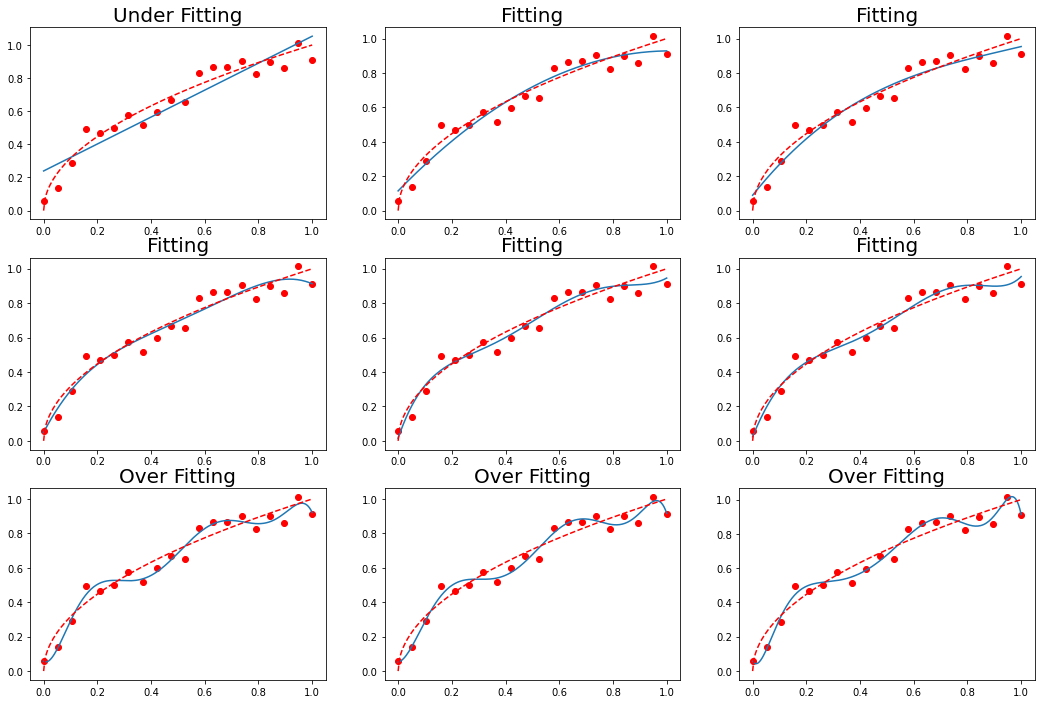

In [40]:
plt.figure(figsize=(18,12))
titles=['Under Fitting','Fitting','Over Fitting']
index=0
models=[None,None,None,None,None,None,None,None,None]
for i in range(1,10):
    plt.subplot(3,3,i)
    models[index]=plot_polynomial_fit(x,y,i)
    plt.title(titles[index],fontsize=20)
    if i==1 or i==6:index+=1

In [86]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [87]:
from sklearn.datasets import make_blobs
centers=[[-2,2],[2,2],[0,4]]
X,y=make_blobs(n_samples=60,centers=centers,random_state=0,cluster_std=0.6)

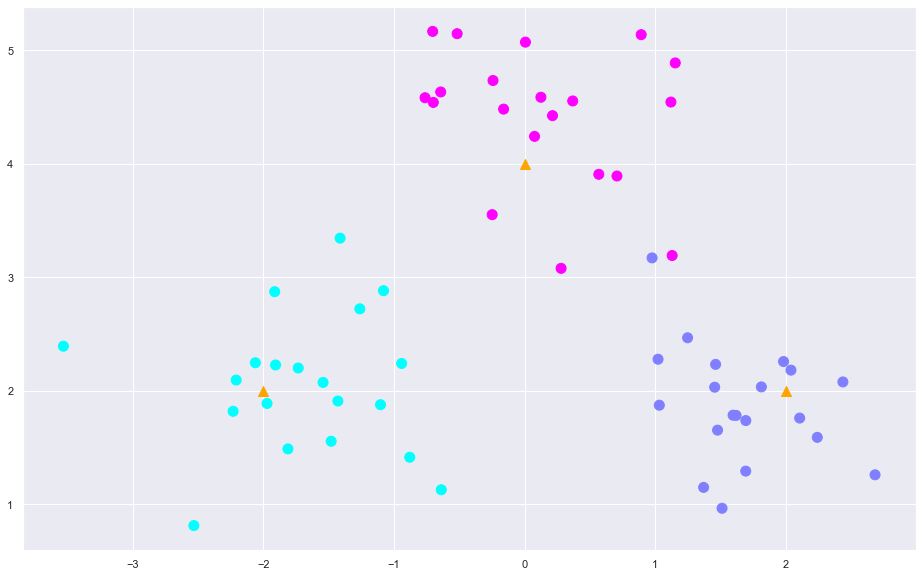

In [90]:
plt.figure(figsize=(16,10))
c=np.array(centers)
plt.scatter(X[:,0],X[:,1],c=y,s=100,cmap='cool')
plt.scatter(c[:,0],c[:,1],s=100,marker='^',c='orange')

In [93]:
from sklearn.neighbors import KNeighborsClassifier
k=5
clf=KNeighborsClassifier(n_neighbors=k)
clf.fit(X,y)

KNeighborsClassifier()

In [95]:
X_sample=[0,2]
X_sample=np.array(X_sample).reshape(1,-1)
y_sample=clf.predict(X_sample)
neighbors=clf.kneighbors(X_sample,return_distance=False)

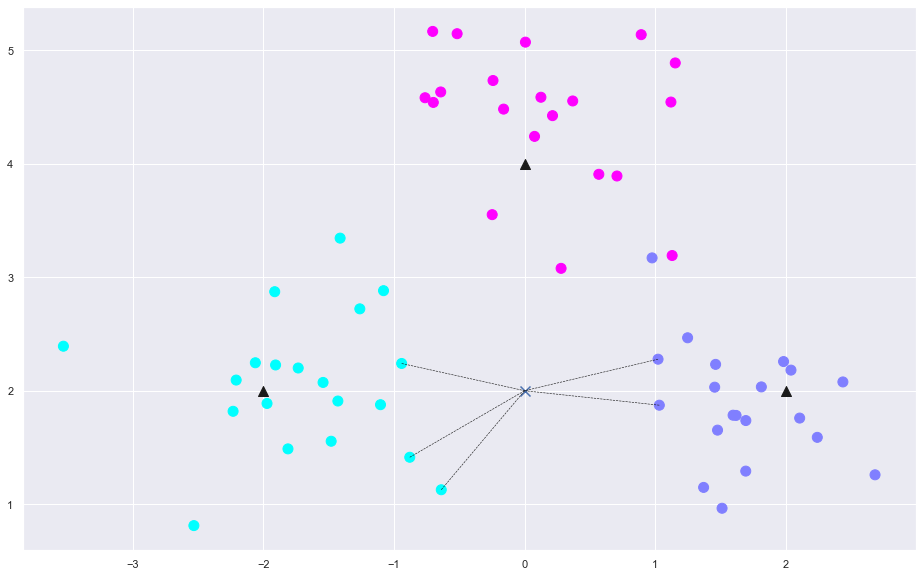

In [97]:
plt.figure(figsize=(16,10))
plt.scatter(X[:,0],X[:,1],c=y,s=100,cmap='cool')
plt.scatter(c[:,0],c[:,1],s=100,marker='^',c='k')
plt.scatter(X_sample[0][0],X_sample[0][1],marker='x',s=100,cmap='cool')
for i in neighbors[0]:
    plt.plot([X[i][0],X_sample[0][0]],[X[i][1],X_sample[0][1]],'k--',linewidth=0.6)

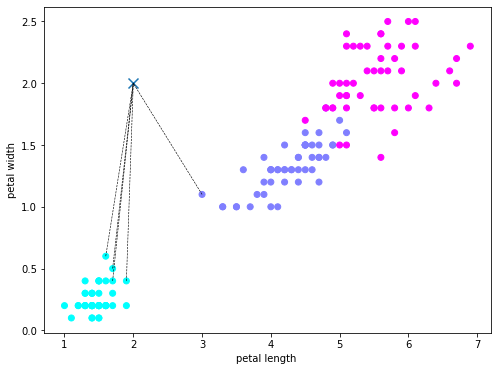

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets #內建資料集
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

iris = datasets.load_iris()
X = iris.data[:, 2:4]
y = iris.target


plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.xlabel('petal length ')
plt.ylabel('petal width')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='cool')

k=5
clf=KNeighborsClassifier(n_neighbors=k)
clf.fit(X,y)

X_sample=[2,2]
X_sample=np.array(X_sample).reshape(1,-1)
y_sample=clf.predict(X_sample)
neighbors=clf.kneighbors(X_sample,return_distance=False)

plt.scatter(X_sample[0][0],X_sample[0][1],marker='x',s=100,cmap='cool')
for i in neighbors[0]:
    plt.plot([X[i][0],X_sample[0][0]],[X[i][1],X_sample[0][1]],'k--',linewidth=0.6)

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [61]:
n_dots=40
X=5*np.random.rand(n_dots,1)
y=np.cos(X).ravel()
y+=0.2*np.random.rand(n_dots)-0.1

In [62]:
from sklearn.neighbors import KNeighborsRegressor
k=5
knn=KNeighborsRegressor(k)
knn.fit(X,y)

KNeighborsRegressor()

In [47]:
T=np.linspace(0,5,500)[:,np.newaxis]
y_pred=knn.predict(T)
knn.score(X,y)

0.9911664805198563

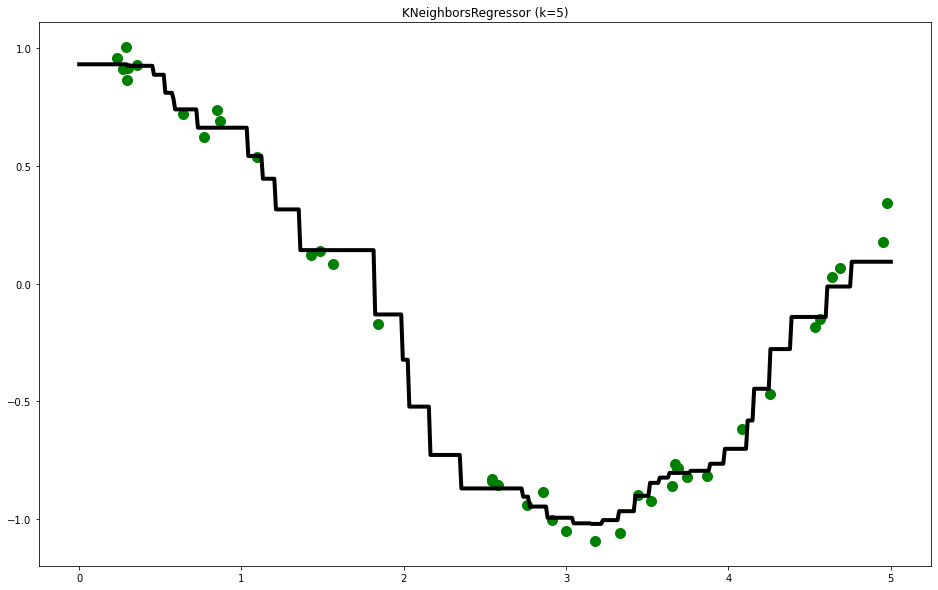

In [49]:
plt.figure(figsize=(16,10))
plt.scatter(X,y,c='g',s=100,label='data')
plt.plot(T,y_pred,c='k',lw=4,label='prediction')
plt.axis('tight')
plt.title("KNeighborsRegressor (k=%i)"%k)
plt.show()

In [107]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [116]:
import random
n_dots=100
X=np.linspace(0,10,n_dots)  
y=np.sqrt(X)
for i in range(n_dots):
    y[i]+=random.uniform(-1, 1)
X=X.reshape(-1,1)
y=y.reshape(-1,1)

In [122]:
from sklearn.neighbors import KNeighborsRegressor
k=10
knn=KNeighborsRegressor(k)
knn.fit(X,y)

KNeighborsRegressor(n_neighbors=10)

In [123]:
T=np.linspace(0,10,500)[:,np.newaxis]
y_pred=knn.predict(T)
knn.score(X,y)

0.7069049551564768

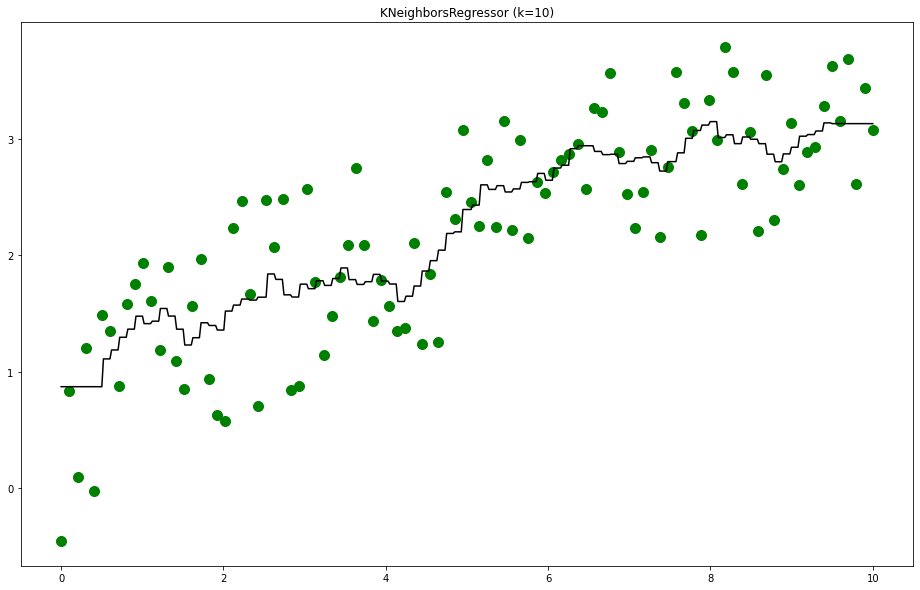

In [124]:
plt.figure(figsize=(16,10))
plt.scatter(X,y,c='g',s=100,label='data')
plt.plot(T,y_pred,c='k',label='prediction')
plt.axis('tight')
plt.title("KNeighborsRegressor (k=%i)"%k)
plt.show()